In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def detect_cracks(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Error: Image not loaded. Please check the image path.")
        return None
    
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    edges = cv2.Canny(blurred, 50, 150)

    kernel = np.ones((5, 5), np.uint8)
    dilated_edges = cv2.dilate(edges, kernel, iterations=1)
    eroded_edges = cv2.erode(dilated_edges, kernel, iterations=1)

    return eroded_edges, image 

In [4]:
def repair_decision(crack_image, threshold_area=5000):

    contours, _ = cv2.findContours(crack_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    total_crack_area = 0
    for contour in contours:
        total_crack_area += cv2.contourArea(contour)

    repair_needed = total_crack_area > threshold_area

    return repair_needed

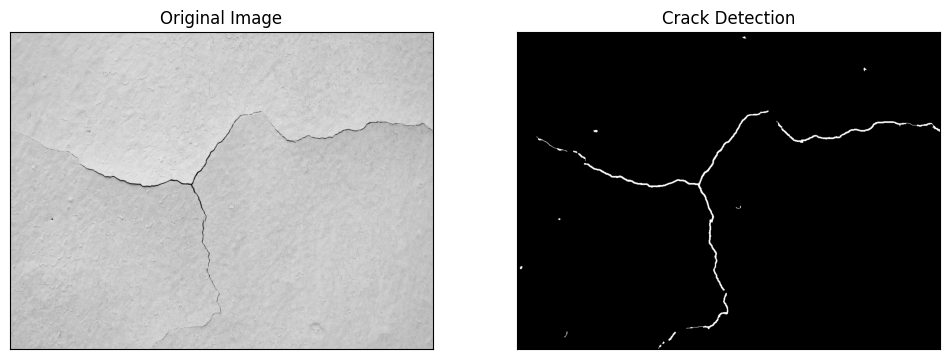

No repair needed.


In [5]:
if __name__ == "__main__":
    input_image_path = 'wallcrack.jpg'

    result, original_image = detect_cracks(input_image_path)

    if result is not None:
        repair_needed = repair_decision(result)

        plt.figure(figsize=(12, 6))
        plt.subplot(121), plt.imshow(original_image, cmap='gray')
        plt.title('Original Image'), plt.xticks([]), plt.yticks([])
        plt.subplot(122), plt.imshow(result, cmap='gray')
        plt.title('Crack Detection'), plt.xticks([]), plt.yticks([])
        plt.show()

        if repair_needed:
            print("Repair is needed.")
        else:
            print("No repair needed.")